# PROJECT  
## Project Title:"Predicting Neonatal Mortality Rate: A Machine Learning Approach with a Focus on India".
## Introduction:

Neonatal mortality, defined as the death of a newborn within the first 28 days of life, remains a critical global health issue. Despite advances in medical technology, over 2.4 million neonatal deaths occurred worldwide in 2020, with the highest burden in low-income countries. India, home to a large proportion of the world's population, faces substantial challenges in addressing neonatal mortality, with significant disparities in rural and urban areas.

The primary causes of neonatal mortality include prematurity, birth asphyxia, infections, and complications during childbirth. These factors are often exacerbated by socioeconomic status, access to quality healthcare, and maternal health. Given the high incidence of neonatal deaths, there is an urgent need to identify patterns and predict high-risk cases in order to implement effective interventions.

**In India, the neonatal mortality rate (per 1000 live births) has improved by ▼ 67 deaths per 1000 live births from 85 [78 - 93] in 1969 to 18 [16 - 21] in 2022.Figures decreasing over time demonstrates progress.**

## Problem Statement:
Neonatal mortality rate, defined as the number of deaths during the first 28 completed days of life per 1000 live births in a given year or other period, remains a significant public health challenge globally, particularly in low- and middle-income countries.Global neonatal mortality rates have declined over the past few decades. In India, neonatal mortality accounts for a large percentage of the overall under-five mortality rate, with contributing factors ranging from inadequate healthcare infrastructure to socioeconomic disparities, maternal health conditions, and limited access to essential neonatal care.

The problem lies in the complexity of identifying and understanding the factors contributing to neonatal mortality. These factors are often interconnected and vary across regions, making it challenging to formulate effective, data-driven interventions. Additionally, while large amounts of data are available (such as maternal health, socioeconomic conditions, healthcare access, etc.), there is a lack of predictive models that can accurately identify at-risk newborns and suggest interventions to reduce neonatal deaths, especially in resource-constrained settings.

The objective of this project is to leverage machine learning techniques to predict neonatal mortality rate based on available dataset,by developing a robust model that can predict neonatal mortality rates with high accuracy, the project aims to provide insights that can help policymakers, healthcare providers, and non-governmental organizations target at-risk populations and implement timely interventions.

Ultimately, the goal is to improve the efficiency of healthcare systems, reduce preventable neonatal deaths, and contribute to the achievement of global health targets, such as the Sustainable Development Goal (SDG) to reduce neonatal mortality to at least as low as 12 per 1,000 live births by 2030.

# DATA PREPROCESSING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [6]:
df=pd.read_csv("Neonatal_mortality_rate.csv")
df

IND_ID       IND_CODE IND_UUID   IND_PER_CODE  DIM_TIME  \
0      A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2013   
1      A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1998   
2      A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1989   
3      A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1994   
4      A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2015   
...                     ...            ...      ...            ...       ...   
10227  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2001   
10228  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1962   
10229  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2017   
10230  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2020   
10231  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1998   

      DIM_TIME_TYPE  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE  \
0              YEAR               788           COUNTRY   
1              YEAR               795           COUNTRY   
2              YEAR               800           COUNTRY   
3              YEAR               804           COUNTRY   
4              YEAR               807           COUNTRY   
...             ...               ...               ...   
10227          YEAR               392           COUNTRY   
10228          YEAR               400           COUNTRY   
10229          YEAR               410           COUNTRY   
10230          YEAR               410           COUNTRY   
10231          YEAR               956         WHOREGION   

      DIM_PUBLISH_STATE_CODE                   IND_NAME     GEO_NAME_SHORT  \
0                  PUBLISHED  Mortality rate (neonetal)            Tunisia   
1                  PUBLISHED  Mortality rate (neonetal)       Turkmenistan   
2                  PUBLISHED  Mortality rate (neonetal)             Uganda   
3                  PUBLISHED  Mortality rate (neonetal)            Ukraine   
4                  PUBLISHED  Mortality rate (neonetal)    North Macedonia   
...                      ...                        ...                ...   
10227              PUBLISHED  Mortality rate (neonetal)              Japan   
10228              PUBLISHED  Mortality rate (neonetal)             Jordan   
10229              PUBLISHED  Mortality rate (neonetal)  Republic of Korea   
10230              PUBLISHED  Mortality rate (neonetal)  Republic of Korea   
10231              PUBLISHED  Mortality rate (neonetal)             Europe   

      DIM_SEX DIM_AGE  RATE_PER_1000_N  RATE_PER_1000_NL  RATE_PER_1000_NU  
0       TOTAL  D_LE27        12.573731         11.735089         13.447589  
1       TOTAL  D_LE27        30.863543         25.964245         37.378921  
2       TOTAL  D_LE27        41.455263         36.773272         48.234667  
3       TOTAL  D_LE27        12.152866         10.191501         14.502732  
4       TOTAL  D_LE27         8.158253          7.507038          8.802212  
...       ...     ...              ...               ...               ...  
10227   TOTAL  D_LE27         1.709870          1.518908          1.776384  
10228   TOTAL  D_LE27        38.230367         33.167084         43.940805  
10229   TOTAL  D_LE27         1.572139          1.458252          1.692252  
10230   TOTAL  D_LE27         1.439682          1.314067          1.567807  
10231   TOTAL  D_LE27        11.329448         10.854816         11.839557  

[10232 rows x 16 columns]

## Basic Analysis

In [8]:
df.head()

IND_ID       IND_CODE IND_UUID   IND_PER_CODE  DIM_TIME  \
0  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2013   
1  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1998   
2  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1989   
3  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1994   
4  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2015   

  DIM_TIME_TYPE  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE DIM_PUBLISH_STATE_CODE  \
0          YEAR               788           COUNTRY              PUBLISHED   
1          YEAR               795           COUNTRY              PUBLISHED   
2          YEAR               800           COUNTRY              PUBLISHED   
3          YEAR               804           COUNTRY              PUBLISHED   
4          YEAR               807           COUNTRY              PUBLISHED   

                    IND_NAME   GEO_NAME_SHORT DIM_SEX DIM_AGE  \
0  Mortality rate (neonetal)          Tunisia   TOTAL  D_LE27   
1  Mortality rate (neonetal)     Turkmenistan   TOTAL  D_LE27   
2  Mortality rate (neonetal)           Uganda   TOTAL  D_LE27   
3  Mortality rate (neonetal)          Ukraine   TOTAL  D_LE27   
4  Mortality rate (neonetal)  North Macedonia   TOTAL  D_LE27   

   RATE_PER_1000_N  RATE_PER_1000_NL  RATE_PER_1000_NU  
0        12.573731         11.735089         13.447589  
1        30.863543         25.964245         37.378921  
2        41.455263         36.773272         48.234667  
3        12.152866         10.191501         14.502732  
4         8.158253          7.507038          8.802212

In [9]:
df.tail()

IND_ID       IND_CODE IND_UUID   IND_PER_CODE  DIM_TIME  \
10227  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2001   
10228  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1962   
10229  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2017   
10230  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2020   
10231  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1998   

      DIM_TIME_TYPE  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE  \
10227          YEAR               392           COUNTRY   
10228          YEAR               400           COUNTRY   
10229          YEAR               410           COUNTRY   
10230          YEAR               410           COUNTRY   
10231          YEAR               956         WHOREGION   

      DIM_PUBLISH_STATE_CODE                   IND_NAME     GEO_NAME_SHORT  \
10227              PUBLISHED  Mortality rate (neonetal)              Japan   
10228              PUBLISHED  Mortality rate (neonetal)             Jordan   
10229              PUBLISHED  Mortality rate (neonetal)  Republic of Korea   
10230              PUBLISHED  Mortality rate (neonetal)  Republic of Korea   
10231              PUBLISHED  Mortality rate (neonetal)             Europe   

      DIM_SEX DIM_AGE  RATE_PER_1000_N  RATE_PER_1000_NL  RATE_PER_1000_NU  
10227   TOTAL  D_LE27         1.709870          1.518908          1.776384  
10228   TOTAL  D_LE27        38.230367         33.167084         43.940805  
10229   TOTAL  D_LE27         1.572139          1.458252          1.692252  
10230   TOTAL  D_LE27         1.439682          1.314067          1.567807  
10231   TOTAL  D_LE27        11.329448         10.854816         11.839557

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  10232 non-null  object 
 1   IND_CODE                10232 non-null  object 
 2   IND_UUID                10232 non-null  object 
 3   IND_PER_CODE            10232 non-null  object 
 4   DIM_TIME                10232 non-null  int64  
 5   DIM_TIME_TYPE           10232 non-null  object 
 6   DIM_GEO_CODE_M49        10232 non-null  int64  
 7   DIM_GEO_CODE_TYPE       10232 non-null  object 
 8   DIM_PUBLISH_STATE_CODE  10232 non-null  object 
 9   IND_NAME                10232 non-null  object 
 10  GEO_NAME_SHORT          10232 non-null  object 
 11  DIM_SEX                 10232 non-null  object 
 12  DIM_AGE                 10232 non-null  object 
 13  RATE_PER_1000_N         10232 non-null  float64
 14  RATE_PER_1000_NL        10232 non-null

## Statistical Analysis

In [12]:
df.describe()

DIM_TIME  DIM_GEO_CODE_M49  RATE_PER_1000_N  RATE_PER_1000_NL  \
count  10232.000000      10232.000000     10232.000000      10232.000000   
mean    1996.112002        440.546814        23.181403         19.743395   
std       16.905464        259.739339        19.205142         16.830862   
min     1951.000000          1.000000         0.660650          0.271921   
25%     1984.000000        212.000000         8.020684          6.556463   
50%     1998.000000        430.000000        18.355545         14.913176   
75%     2010.000000        662.000000        33.569481         28.305707   
max     2022.000000        958.000000       119.998742        101.483831   

       RATE_PER_1000_NU  
count      10232.000000  
mean          27.567864  
std           22.751466  
min            0.837179  
25%            9.327372  
50%           21.899713  
75%           40.489551  
max          142.893576

## Data Cleaning 

***1)Missing value checking***

In [15]:
df.isnull().sum()

IND_ID                    0
IND_CODE                  0
IND_UUID                  0
IND_PER_CODE              0
DIM_TIME                  0
DIM_TIME_TYPE             0
DIM_GEO_CODE_M49          0
DIM_GEO_CODE_TYPE         0
DIM_PUBLISH_STATE_CODE    0
IND_NAME                  0
GEO_NAME_SHORT            0
DIM_SEX                   0
DIM_AGE                   0
RATE_PER_1000_N           0
RATE_PER_1000_NL          0
RATE_PER_1000_NU          0
dtype: int64

**Note:No Missing values**

***2)Check for duplicate rows***

In [18]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


***3)Handling Outliers***

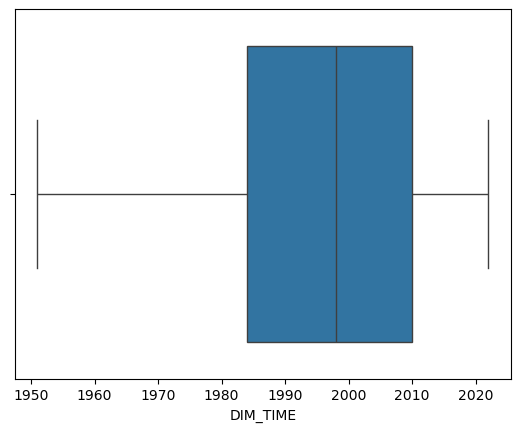

In [20]:
sns.boxplot(data=df,x='DIM_TIME')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

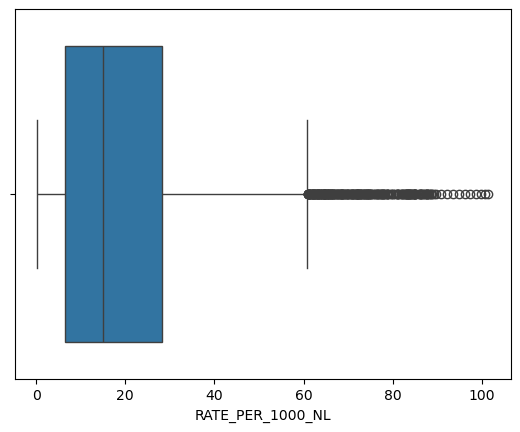

In [21]:
sns.boxplot(data=df,x='RATE_PER_1000_NL')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

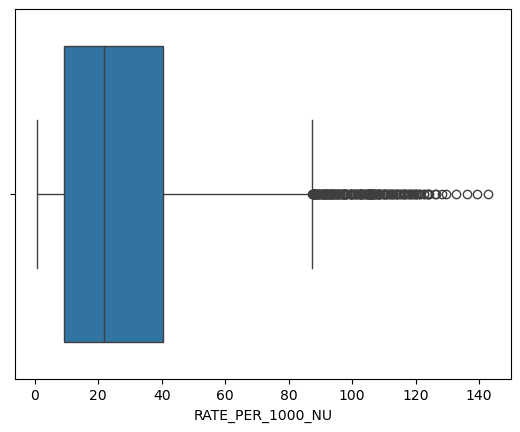

In [22]:
sns.boxplot(data=df,x='RATE_PER_1000_NU')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

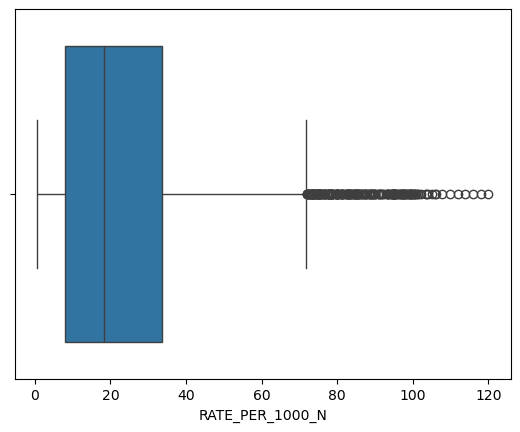

In [23]:
sns.boxplot(data=df,x='RATE_PER_1000_N')
plt.show

In [24]:
filter=(df['RATE_PER_1000_NL']<55) & (df['RATE_PER_1000_NU']<79) & (df['RATE_PER_1000_N']<67)
data=df[filter]

***After Handling Outliers***

<function matplotlib.pyplot.show(close=None, block=None)>

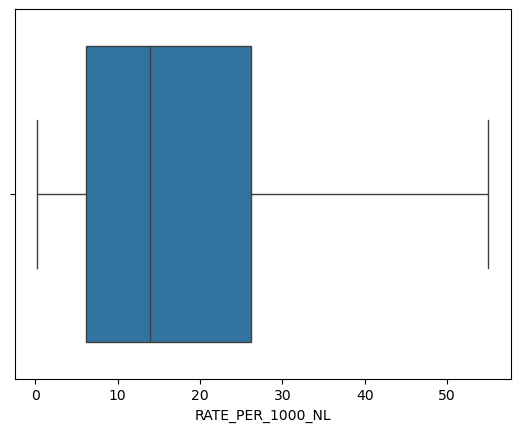

In [26]:
sns.boxplot(data=data,x='RATE_PER_1000_NL')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

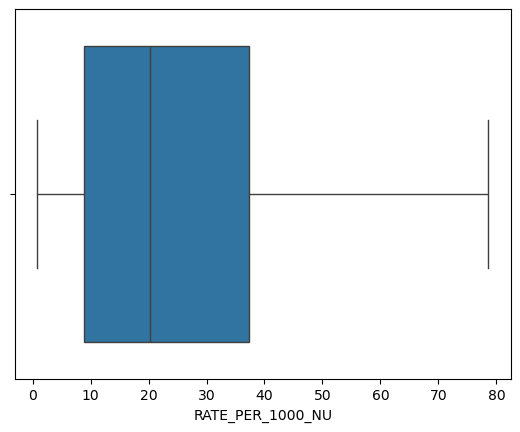

In [27]:
sns.boxplot(data=data,x='RATE_PER_1000_NU')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

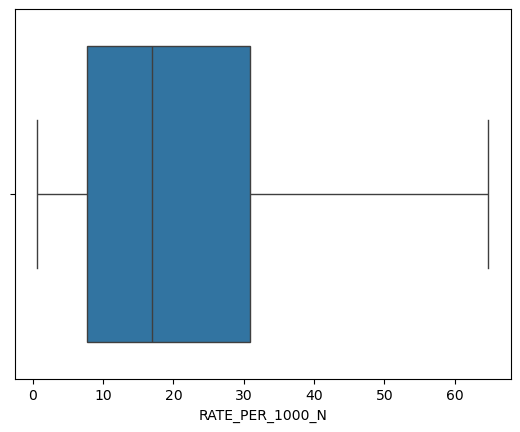

In [28]:
sns.boxplot(data=data,x='RATE_PER_1000_N')
plt.show

***4)Cleaning the Country Names***

In [30]:
import re
def clean_country_name(GEO_NAME_SHORT):
    # Remove anything in parentheses and extra spaces
    cleaned_name = re.sub(r'\(.*?\)', '', GEO_NAME_SHORT)
    
    # Remove commas, apostrophes, and hyphens
    cleaned_name = re.sub(r"[,\-')]+", '', cleaned_name)
    
    # Strip any leading/trailing spaces
    cleaned_name = cleaned_name.strip()
    
    return cleaned_name

data['Country'] = data['GEO_NAME_SHORT'].apply(clean_country_name)
print(data['Country'])

0                  Tunisia
1             Turkmenistan
2                   Uganda
3                  Ukraine
4          North Macedonia
               ...        
10227                Japan
10228               Jordan
10229    Republic of Korea
10230    Republic of Korea
10231               Europe
Name: Country, Length: 9771, dtype: object


In [31]:
data.head()

IND_ID       IND_CODE IND_UUID   IND_PER_CODE  DIM_TIME  \
0  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2013   
1  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1998   
2  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1989   
3  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      1994   
4  A4C49D3WHOSIS_000003  WHOSIS_000003  A4C49D3  WHOSIS_000003      2015   

  DIM_TIME_TYPE  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE DIM_PUBLISH_STATE_CODE  \
0          YEAR               788           COUNTRY              PUBLISHED   
1          YEAR               795           COUNTRY              PUBLISHED   
2          YEAR               800           COUNTRY              PUBLISHED   
3          YEAR               804           COUNTRY              PUBLISHED   
4          YEAR               807           COUNTRY              PUBLISHED   

                    IND_NAME   GEO_NAME_SHORT DIM_SEX DIM_AGE  \
0  Mortality rate (neonetal)          Tunisia   TOTAL  D_LE27   
1  Mortality rate (neonetal)     Turkmenistan   TOTAL  D_LE27   
2  Mortality rate (neonetal)           Uganda   TOTAL  D_LE27   
3  Mortality rate (neonetal)          Ukraine   TOTAL  D_LE27   
4  Mortality rate (neonetal)  North Macedonia   TOTAL  D_LE27   

   RATE_PER_1000_N  RATE_PER_1000_NL  RATE_PER_1000_NU          Country  
0        12.573731         11.735089         13.447589          Tunisia  
1        30.863543         25.964245         37.378921     Turkmenistan  
2        41.455263         36.773272         48.234667           Uganda  
3        12.152866         10.191501         14.502732          Ukraine  
4         8.158253          7.507038          8.802212  North Macedonia

## Dividing Data And Feature Engineering

***Selecting relevant features***

In [34]:
features=data.loc[:,['DIM_TIME','DIM_GEO_CODE_M49','DIM_GEO_CODE_TYPE','DIM_SEX','DIM_AGE','Country','RATE_PER_1000_NL','RATE_PER_1000_NU','RATE_PER_1000_N']]
features

DIM_TIME  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE DIM_SEX DIM_AGE  \
0          2013               788           COUNTRY   TOTAL  D_LE27   
1          1998               795           COUNTRY   TOTAL  D_LE27   
2          1989               800           COUNTRY   TOTAL  D_LE27   
3          1994               804           COUNTRY   TOTAL  D_LE27   
4          2015               807           COUNTRY   TOTAL  D_LE27   
...         ...               ...               ...     ...     ...   
10227      2001               392           COUNTRY   TOTAL  D_LE27   
10228      1962               400           COUNTRY   TOTAL  D_LE27   
10229      2017               410           COUNTRY   TOTAL  D_LE27   
10230      2020               410           COUNTRY   TOTAL  D_LE27   
10231      1998               956         WHOREGION   TOTAL  D_LE27   

                 Country  RATE_PER_1000_NL  RATE_PER_1000_NU  RATE_PER_1000_N  
0                Tunisia         11.735089         13.447589        12.573731  
1           Turkmenistan         25.964245         37.378921        30.863543  
2                 Uganda         36.773272         48.234667        41.455263  
3                Ukraine         10.191501         14.502732        12.152866  
4        North Macedonia          7.507038          8.802212         8.158253  
...                  ...               ...               ...              ...  
10227              Japan          1.518908          1.776384         1.709870  
10228             Jordan         33.167084         43.940805        38.230367  
10229  Republic of Korea          1.458252          1.692252         1.572139  
10230  Republic of Korea          1.314067          1.567807         1.439682  
10231             Europe         10.854816         11.839557        11.329448  

[9771 rows x 9 columns]

***Dividing features***

In [36]:
x=features.iloc[:,:-1].values
y=features.iloc[:,-1].values

In [37]:
x

array([[2013, 788, 'COUNTRY', ..., 'Tunisia', 11.73508903, 13.44758864],
       [1998, 795, 'COUNTRY', ..., 'Turkmenistan', 25.96424533,
        37.37892114],
       [1989, 800, 'COUNTRY', ..., 'Uganda', 36.77327238, 48.23466725],
       ...,
       [2017, 410, 'COUNTRY', ..., 'Republic of Korea', 1.458252491,
        1.692251844],
       [2020, 410, 'COUNTRY', ..., 'Republic of Korea', 1.314067269,
        1.567807425],
       [1998, 956, 'WHOREGION', ..., 'Europe', 10.85481559, 11.83955698]],
      dtype=object)

In [38]:
y

array([12.57373102, 30.86354252, 41.45526348, ...,  1.57213867,
        1.43968205, 11.32944773])

***Encoding categorical data***

In [40]:
from sklearn.preprocessing import LabelEncoder
# Columns to encode
cols_to_encode = [2, 3, 4, 5]

# Apply label encoding to specified columns
encoders = {}  # To store encoders if needed later
for col in cols_to_encode:
    le = LabelEncoder()
    x[:, col] = le.fit_transform(x[:, col])
    
#encoders[col] = le  # Save the encoder  to inverse transform later

In [41]:
x

array([[2013, 788, 0, ..., 185, 11.73508903, 13.44758864],
       [1998, 795, 0, ..., 186, 25.96424533, 37.37892114],
       [1989, 800, 0, ..., 190, 36.77327238, 48.23466725],
       ...,
       [2017, 410, 0, ..., 148, 1.458252491, 1.692251844],
       [2020, 410, 0, ..., 148, 1.314067269, 1.567807425],
       [1998, 956, 4, ..., 65, 10.85481559, 11.83955698]], dtype=object)

## Splitting and Feature Scaling

***Splitting***

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

***Standardisation***

In [46]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
x_train

array([[ 1.45087335,  1.01890278, -0.20037987, ...,  1.0602087 ,
        -1.08914789, -1.14880442],
       [-0.32458343,  0.75479415, -0.20037987, ...,  0.75645421,
        -0.64314075, -0.7390604 ],
       [-1.54903637,  0.68589624, -0.20037987, ...,  0.72270371,
        -0.13469484, -0.36740543],
       ...,
       [-0.07969284,  1.0265581 , -0.20037987, ...,  1.07708395,
        -1.03791418, -1.10227763],
       [ 0.71620158, -0.24805312, -0.20037987, ..., -0.2391855 ,
        -1.12281007, -1.18076936],
       [-0.26336078,  0.34906205, -0.20037987, ...,  0.45269972,
        -1.00165465, -1.08460793]])

In [48]:
x_train.shape

(7816, 8)

In [49]:
x_test

array([[ 1.20598276,  1.74998609, -0.20037987, ...,  1.71834342,
         0.27153765,  0.39436772],
       [-0.26336078,  0.54044511, -0.20037987, ...,  0.57082647,
        -1.05856063, -1.1249929 ],
       [ 0.77742423,  0.49451318, -0.20037987, ...,  0.52020072,
         1.14895014,  0.99251716],
       ...,
       [ 1.3896507 ,  0.78541544, -0.20037987, ...,  0.80707996,
        -1.09258497, -1.13568169],
       [-0.01847019, -0.7150278 , -0.20037987, ..., -0.57669049,
        -1.08747738, -1.15367179],
       [ 0.59375628,  1.23707947, -0.20037987, ...,  1.27958694,
        -0.64677027, -0.66459805]])

In [50]:
x_test.shape

(1955, 8)

# VISUALISATION

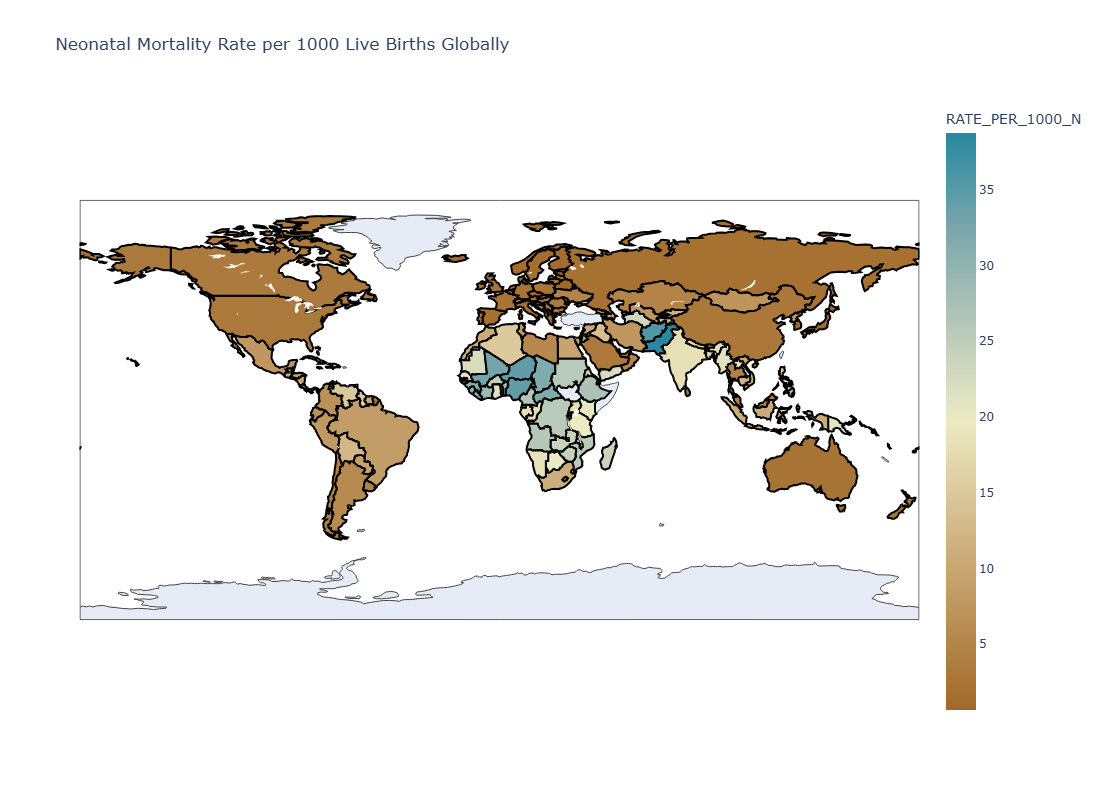

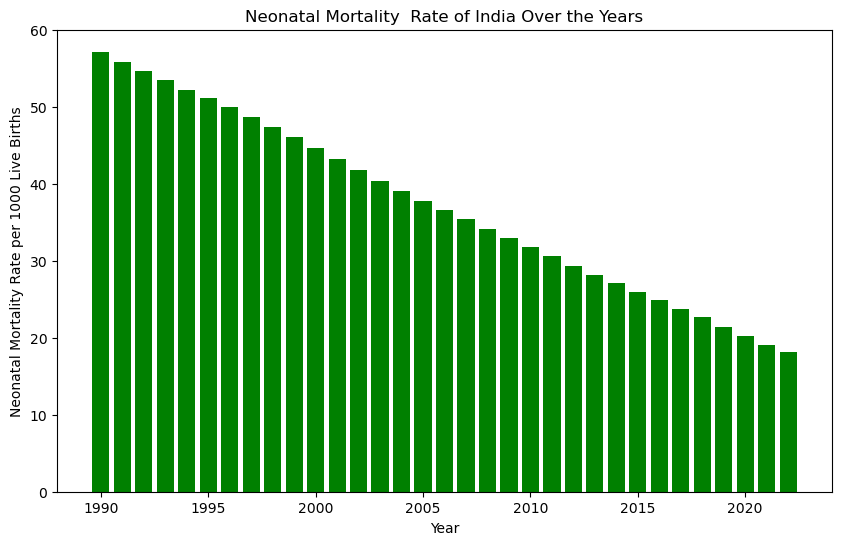

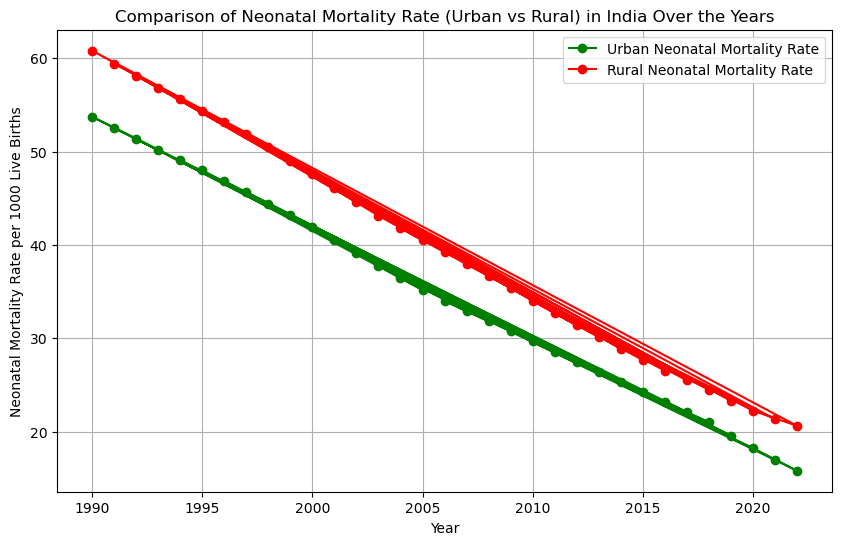

In [52]:
#1)MAP
import plotly.express as px
features_2022=features[features['DIM_TIME']==2022]
fig = px.choropleth(features_2022, 
                    locations='Country', 
                    locationmode='country names', 
                    color='RATE_PER_1000_N',
                    hover_name='Country',
                    hover_data=['RATE_PER_1000_N','DIM_TIME'],
                    color_continuous_scale='Earth',
                    labels={'Neonatal Mortality Rate': 'RATE_PER_1000_N'},
                    title='Neonatal Mortality Rate per 1000 Live Births Globally'
                   )
fig.update_traces(
    marker=dict(
        line=dict(color='black', width=2)  # Add border to countries
    )
)    
fig.update_layout(
    width=1100,  
    height=800  
)
fig.show()

#2)BAR CHART
features_India=features[features['Country']=='India']
plt.figure(figsize=(10,6))
plt.bar(features_India['DIM_TIME'],features_India['RATE_PER_1000_N'],color='g')
plt.xlabel("Year")
plt.ylabel("Neonatal Mortality Rate per 1000 Live Births")
plt.title("Neonatal Mortality  Rate of India Over the Years")
plt.show()

#3)Lineplot:Plot Urban and Rural Neonatal Mortality Rates
plt.figure(figsize=(10, 6))
plt.plot(features_India['DIM_TIME'],features_India['RATE_PER_1000_NL'], label='Urban Neonatal Mortality Rate',linestyle='-', color='g', marker='o')
plt.plot(features_India['DIM_TIME'],features_India['RATE_PER_1000_NU'], label='Rural Neonatal Mortality Rate',linestyle='-', color='r', marker='o')
plt.xlabel("Year")
plt.ylabel("Neonatal Mortality Rate per 1000 Live Births")
plt.title("Comparison of Neonatal Mortality Rate (Urban vs Rural) in India Over the Years")
plt.legend()
plt.grid()
plt.show()


## Observation
**The neonatal mortality rate in India has significantly decreased over the years, from 57 deaths per 1,000 live births in 1990 to 18 deaths per 1,000 live births in 2022. This represents an improvement of 39 deaths per 1,000 live births, demonstrating considerable progress.**

India has also performed well on the global stage when compared with neighboring countries like Pakistan and Afghanistan, as well as African countries such as Nigeria, Niger, Mali, and Somalia. However, to align with the neonatal mortality rates of more developed nations, India must continue to focus on reducing this rate further.

**The neonatal mortality rate in rural areas has been higher than in urban areas over the years in India.** This disparity can primarily be attributed to several factors, including lower income levels, limited access to healthcare facilities, inadequate antenatal care, poor nutrition, and the fact that many deliveries occur without the presence of skilled health professionals. Addressing these factors is crucial for reducing neonatal mortality in rural areas.



# MODEL GENERATION

**1)LINEAR REGRESSION-MULTILINEAR REGRESSION**

**Training**

In [57]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

**Prediction**

In [59]:
y_pred_linear=linear_model.predict(x_test)

In [60]:
pv_av=pd.DataFrame(data={'Predicted Value':y_pred_linear,'Actual Value':y_test})
pv_av

Predicted Value  Actual Value
0           25.783279     26.027073
1            3.522868      3.434417
2           37.599874     37.975397
3           14.092687     13.124257
4            4.335389      4.281882
...               ...           ...
1950         1.842123      1.726278
1951        39.180532     39.092742
1952         3.107663      3.084482
1953         3.069283      3.004145
1954        10.329440     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [62]:
r2_linear=r2_score(y_test,y_pred_linear)
print("Accuracy:",r2_linear*100,'%')

Accuracy: 99.91749019380374 %


**Visualisation**

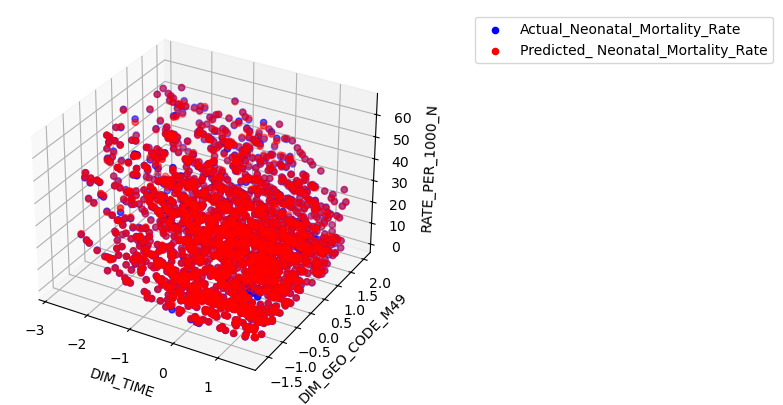

In [64]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_linear,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**2)DESICION TREE REGRESSION**

**Training**

In [67]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt=DecisionTreeRegressor(criterion='squared_error',max_depth=5)
regressor_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

**Prediction**

In [69]:
y_pred_tree=regressor_dt.predict(x_test)

In [70]:
pv_av_tree=pd.DataFrame(data={'Predicted Value':y_pred_tree,'Actual Value':y_test})
pv_av_tree

Predicted Value  Actual Value
0           22.597305     26.027073
1            3.185925      3.434417
2           37.022974     37.975397
3           12.617545     13.124257
4            4.478946      4.281882
...               ...           ...
1950         1.852778      1.726278
1951        37.022974     39.092742
1952         3.185925      3.084482
1953         3.185925      3.004145
1954         9.739171     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [72]:
r2_dt=r2_score(y_test,y_pred_tree)
print("Accuracy:",r2_dt*100,'%')

Accuracy: 99.19311665219371 %


**Visualisation**

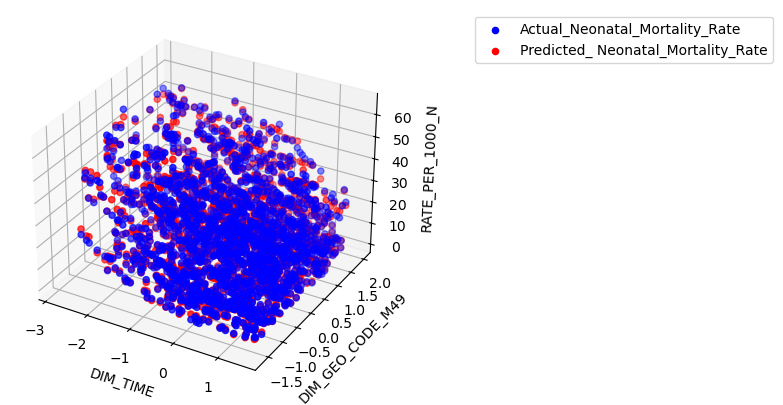

In [74]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_tree,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**3)RANDOM FOREST REGRESSION**

**Training**

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(n_estimators=100,max_depth=5)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

**Prediction**

In [79]:
y_pred_rf=rf_regressor.predict(x_test)

In [80]:
pv_av_rftree=pd.DataFrame(data={'Predicted Value':y_pred_rf,'Actual Value':y_test})
pv_av_rftree

Predicted Value  Actual Value
0           24.575798     26.027073
1            3.211223      3.434417
2           37.208884     37.975397
3           13.589687     13.124257
4            4.719632      4.281882
...               ...           ...
1950         1.853852      1.726278
1951        38.165433     39.092742
1952         3.199082      3.084482
1953         3.182979      3.004145
1954        10.171609     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [82]:
r2Rf=r2_score(y_test,y_pred_rf)
print("Accuracy",r2Rf*100,'%')

Accuracy 99.71609555743564 %


**Visualisation**

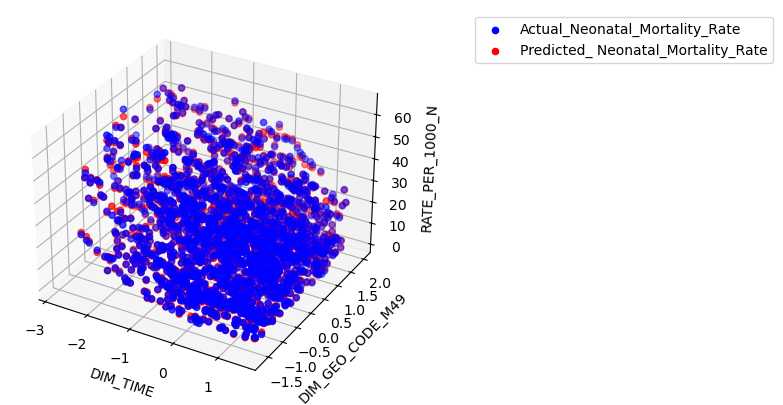

In [84]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_rf,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**4)KNN**

**Training**

In [87]:
from sklearn.neighbors import KNeighborsRegressor
regressor_knn=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
regressor_knn.fit(x_train,y_train)

KNeighborsRegressor()

**Prediction**

In [89]:
y_pred_knn=regressor_knn.predict(x_test)

In [90]:
pv_av_knn=pd.DataFrame(data={'Predicted Value':y_pred_knn,'Actual Value':y_test})
pv_av_knn

Predicted Value  Actual Value
0           25.560068     26.027073
1            3.502890      3.434417
2           37.916009     37.975397
3           12.392450     13.124257
4            4.437415      4.281882
...               ...           ...
1950         1.760888      1.726278
1951        39.916380     39.092742
1952         2.870593      3.084482
1953         2.947764      3.004145
1954        10.336970     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [92]:
r2k=r2_score(y_test,y_pred_knn)
print("Accuracy",r2k*100,'%')

Accuracy 99.86972587267826 %


**Visualisation**

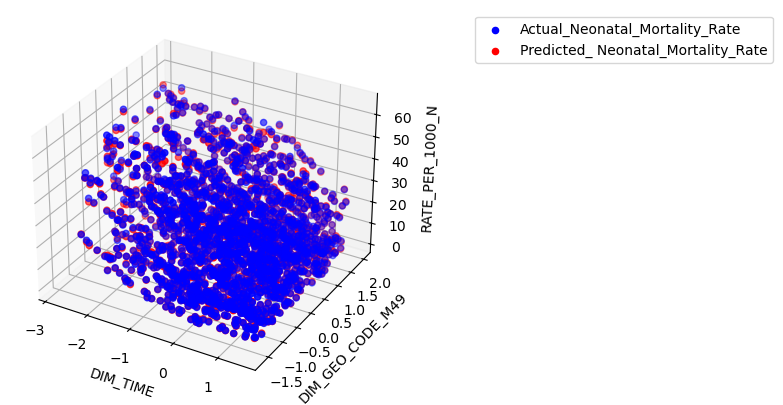

In [94]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_knn,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**5)SVM REGRESSION**

**Training**

In [97]:
from sklearn.svm import SVR
SVR_model=SVR(kernel='rbf',C=100)
SVR_model.fit(x_train,y_train)

SVR(C=100)

**Prediction**

In [99]:
y_pred_svr=SVR_model.predict(x_test)

In [100]:
pv_av_svm=pd.DataFrame(data={'Predicted Value':y_pred_svr,'Actual Value':y_test})
pv_av_svm

Predicted Value  Actual Value
0           25.937411     26.027073
1            3.446439      3.434417
2           37.835132     37.975397
3           12.784400     13.124257
4            4.284100      4.281882
...               ...           ...
1950         1.756772      1.726278
1951        39.178941     39.092742
1952         3.042701      3.084482
1953         3.006315      3.004145
1954        10.466530     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [102]:
r2s=r2_score(y_test,y_pred_svr)
print("Accuracy",r2s*100,'%')

Accuracy 99.97125815456423 %


**Visualisation**

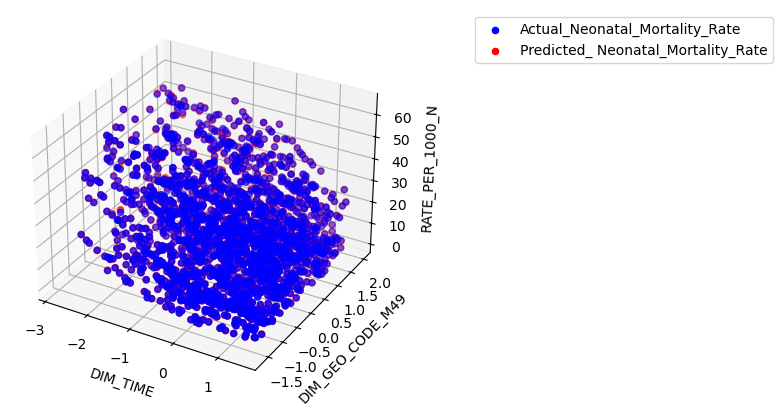

In [104]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_svr,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**6)POLYNOMIAL REGRESSION**

**Training**

In [107]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [108]:
degree=2
model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**Prediction**

In [110]:
y_pred_poly=model.predict(x_test)

In [111]:
pv_av_poly=pd.DataFrame(data={'Predicted Value':y_pred_poly,'Actual Value':y_test})
pv_av_poly

Predicted Value  Actual Value
0           25.923389     26.027073
1            3.569665      3.434417
2           37.664970     37.975397
3           13.508679     13.124257
4            4.354480      4.281882
...               ...           ...
1950         1.854844      1.726278
1951        38.680410     39.092742
1952         3.093237      3.084482
1953         3.061987      3.004145
1954        10.355415     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [113]:
r2p=r2_score(y_test,y_pred_poly)
print("Accuracy",r2p*100,'%')

Accuracy 99.95289028943992 %


**Visualisation**

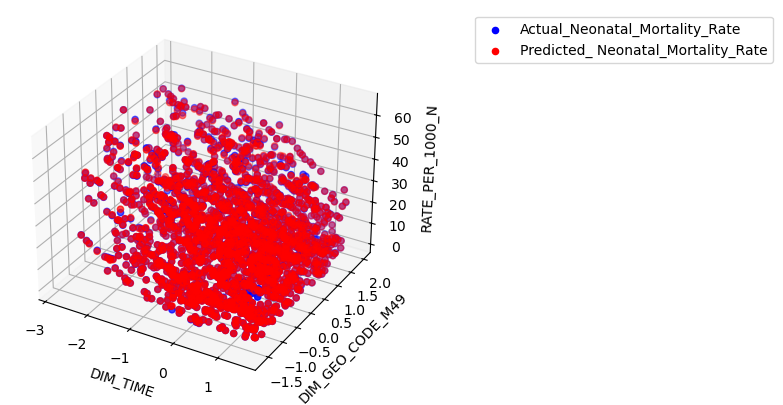

In [115]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_poly,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**7)LASSO**

**Training**

In [118]:
Lasso_model=make_pipeline(PolynomialFeatures(degree),Lasso(alpha=0.1,max_iter=10000))
Lasso_model.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.1, max_iter=10000))])

**Prediction**

In [120]:
y_pred_Lasso=Lasso_model.predict(x_test)

In [121]:
pv_av_lasso=pd.DataFrame(data={'Predicted Value':y_pred_Lasso,'Actual Value':y_test})
pv_av_lasso

Predicted Value  Actual Value
0           25.789923     26.027073
1            3.615123      3.434417
2           37.530475     37.975397
3           14.145758     13.124257
4            4.446157      4.281882
...               ...           ...
1950         1.968648      1.726278
1951        39.098727     39.092742
1952         3.249201      3.084482
1953         3.164133      3.004145
1954        10.408931     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [123]:
r2L=r2_score(y_test,y_pred_Lasso)
print("Accuracy",r2L*100,'%')

Accuracy 99.9125202063292 %


**Visualisation**

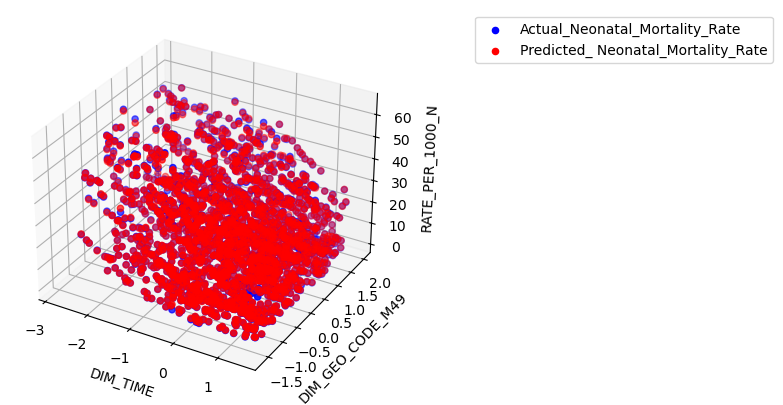

In [125]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_Lasso,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

**8)Ridge**

**Training**

In [128]:
ridge_model=make_pipeline(PolynomialFeatures(degree),Ridge(alpha=0.1,max_iter=10000))
ridge_model.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.1, max_iter=10000))])

**Prediction**

In [130]:
y_pred_ridge=ridge_model.predict(x_test)

In [131]:
pv_av_ridge=pd.DataFrame(data={'Predicted Value':y_pred_ridge,'Actual Value':y_test})
pv_av_ridge

Predicted Value  Actual Value
0           25.922764     26.027073
1            3.569877      3.434417
2           37.665019     37.975397
3           13.508678     13.124257
4            4.354657      4.281882
...               ...           ...
1950         1.855009      1.726278
1951        38.681820     39.092742
1952         3.093484      3.084482
1953         3.062177      3.004145
1954        10.355433     10.338439

[1955 rows x 2 columns]

**Evaluation**

In [133]:
r2R=r2_score(y_test,y_pred_ridge)
print("Accuracy",r2R*100,'%')

Accuracy 99.95287739571427 %


**Visualisation**

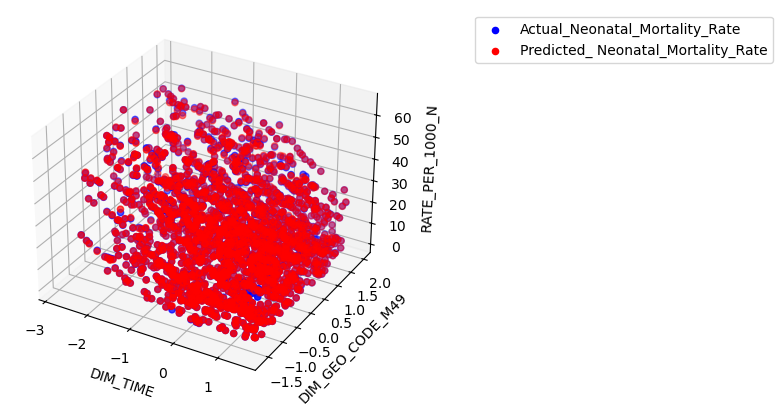

In [135]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_test[:,0],x_test[:,1],y_test,color='blue',label='Actual_Neonatal_Mortality_Rate')
ax.scatter(x_test[:,0],x_test[:,1],y_pred_ridge,color='red',label='Predicted_ Neonatal_Mortality_Rate')
ax.set_xlabel("DIM_TIME")
ax.set_ylabel("DIM_GEO_CODE_M49")
ax.set_zlabel("RATE_PER_1000_N")
ax.legend()
# Positioning the legend in the top-right corner
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.show()

## COMPARISON

In [137]:
print(f"LinearRegression:R²: {r2_linear:.4f}")
print(f"PolynomialRegression:R²: {r2p:.4f}")
print(f"Polynomial with Lasso:R²: {r2L:.4f}")
print(f"Polynomial with Ridge:R²: {r2R:.4f}")
print(f"Decision Tree Regression:R²: {r2_dt:.4f}")
print(f"Random forest Regression:R²: {r2Rf:.4f}")
print(f"KNN Regression:R²: {r2k:.4f}")
print(f"SVM Regression:R²: {r2s:.4f}")

LinearRegression:R²: 0.9992
PolynomialRegression:R²: 0.9995
Polynomial with Lasso:R²: 0.9991
Polynomial with Ridge:R²: 0.9995
Decision Tree Regression:R²: 0.9919
Random forest Regression:R²: 0.9972
KNN Regression:R²: 0.9987
SVM Regression:R²: 0.9997


# OBSERVATION

Among all the regression models tested, **Support Vector Machine (SVM) Regression achieved the highest R² score of 0.9997**, indicating the best performance in terms of accuracy and fit to the data. While **Polynomial Regression (with or without regularization using Lasso or Ridge) also performed exceptionally well (R² ≈ 0.9995)**, SVM slightly outperformed them, suggesting it can model the underlying data patterns more effectively in this case. Other models like **Random Forest (0.9972) and KNN Regression (0.9987) also showed strong results**, whereas **Decision Tree Regression had the lowest R² score of 0.9919,** indicating a relatively weaker performance compared to the others.

**SVM Regression is the most suitable model for this dataset, offering the best balance of accuracy and generalization capability.**

# FUTURE PREDICTION

## GLOBALLY

***NEW DATA FOR PREDICTION***

In [143]:
new_data = pd.DataFrame({
    'DIM_TIME': ['2023', '2023', '2023', '2023','2023','2023','2023','2023','2023','2023','2023','2023','2023'],
    'DIM_GEO_CODE_M49': [414, 882, 308, 380,28,356,92,96,418,180,408,275,826],
    'DIM_GEO_CODE_TYPE': ['COUNTRY', 'COUNTRY', 'COUNTRY', 'COUNTRY','COUNTRY','COUNTRY','OVERSEAS TERRITORY','COUNTRY','COUNTRY','COUNTRY','COUNTRY','NATIONAL LIBERATION MOVEMENT','COUNTRY'],
    'DIM_SEX': ['TOTAL', 'TOTAL', 'TOTAL', 'TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL','TOTAL'],
    'DIM_AGE': ['D_LE27', 'D_LE27', 'D_LE27', 'D_LE27','D_LE27','D_LE27','D_LE27','D_LE27','D_LE27','D_LE27','D_LE27','D_LE27','D_LE27'],
    'Country': ['Kuwait', 'Samoa', 'Grenada', 'Italy','Antigua and Barbuda','India','British Virgin Islands','Brunei Darussalam','Lao Peoples Democratic Republic','Democratic Republic of the Congo','Democratic Peoples Republic of Korea','occupied Palestinian territory including east Jerusalem','United Kingdom of Great Britain and Northern Ireland'],
    'RATE_PER_1000_NL': [2.861231, 2.690523, 6.532146, 1.052311,2.823085224,14.81491614,2.1821957,3.254356603,12.22999538,13.17917885,4.150157951,5.156001084,1.455260067],
    'RATE_PER_1000_NU': [4.599943, 7.057438, 11.766696, 1.124609,6.413058347,19.63739857,12.93529028,4.908811811,29.1112133,44.65056809,12.93488232,11.93341503,1.991719248]
})

new_data

DIM_TIME  DIM_GEO_CODE_M49             DIM_GEO_CODE_TYPE DIM_SEX DIM_AGE  \
0      2023               414                       COUNTRY   TOTAL  D_LE27   
1      2023               882                       COUNTRY   TOTAL  D_LE27   
2      2023               308                       COUNTRY   TOTAL  D_LE27   
3      2023               380                       COUNTRY   TOTAL  D_LE27   
4      2023                28                       COUNTRY   TOTAL  D_LE27   
5      2023               356                       COUNTRY   TOTAL  D_LE27   
6      2023                92            OVERSEAS TERRITORY   TOTAL  D_LE27   
7      2023                96                       COUNTRY   TOTAL  D_LE27   
8      2023               418                       COUNTRY   TOTAL  D_LE27   
9      2023               180                       COUNTRY   TOTAL  D_LE27   
10     2023               408                       COUNTRY   TOTAL  D_LE27   
11     2023               275  NATIONAL LIBERATION MOVEMENT   TOTAL  D_LE27   
12     2023               826                       COUNTRY   TOTAL  D_LE27   

                                              Country  RATE_PER_1000_NL  \
0                                              Kuwait          2.861231   
1                                               Samoa          2.690523   
2                                             Grenada          6.532146   
3                                               Italy          1.052311   
4                                 Antigua and Barbuda          2.823085   
5                                               India         14.814916   
6                              British Virgin Islands          2.182196   
7                                   Brunei Darussalam          3.254357   
8                     Lao Peoples Democratic Republic         12.229995   
9                    Democratic Republic of the Congo         13.179179   
10               Democratic Peoples Republic of Korea          4.150158   
11  occupied Palestinian territory including east ...          5.156001   
12  United Kingdom of Great Britain and Northern I...          1.455260   

    RATE_PER_1000_NU  
0           4.599943  
1           7.057438  
2          11.766696  
3           1.124609  
4           6.413058  
5          19.637399  
6          12.935290  
7           4.908812  
8          29.111213  
9          44.650568  
10         12.934882  
11         11.933415  
12          1.991719

In [144]:
newdata=new_data.values
newdata

array([['2023', 414, 'COUNTRY', 'TOTAL', 'D_LE27', 'Kuwait', 2.861231,
        4.599943],
       ['2023', 882, 'COUNTRY', 'TOTAL', 'D_LE27', 'Samoa', 2.690523,
        7.057438],
       ['2023', 308, 'COUNTRY', 'TOTAL', 'D_LE27', 'Grenada', 6.532146,
        11.766696],
       ['2023', 380, 'COUNTRY', 'TOTAL', 'D_LE27', 'Italy', 1.052311,
        1.124609],
       ['2023', 28, 'COUNTRY', 'TOTAL', 'D_LE27', 'Antigua and Barbuda',
        2.823085224, 6.413058347],
       ['2023', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 14.81491614,
        19.63739857],
       ['2023', 92, 'OVERSEAS TERRITORY', 'TOTAL', 'D_LE27',
        'British Virgin Islands', 2.1821957, 12.93529028],
       ['2023', 96, 'COUNTRY', 'TOTAL', 'D_LE27', 'Brunei Darussalam',
        3.254356603, 4.908811811],
       ['2023', 418, 'COUNTRY', 'TOTAL', 'D_LE27',
        'Lao Peoples Democratic Republic', 12.22999538, 29.1112133],
       ['2023', 180, 'COUNTRY', 'TOTAL', 'D_LE27',
        'Democratic Republic of the Cong

***LABELENCODING AND FEATURESCALING***

In [146]:
# Columns to encode
columns_to_encode = [2, 3, 4, 5]

# Apply label encoding to specified columns
encoders = {}  # To store encoders if needed later
for col in columns_to_encode:
    label = LabelEncoder()
    newdata[:, col] = label.fit_transform(newdata[:, col])   

In [147]:
newdata

array([['2023', 414, 0, 0, 0, 8, 2.861231, 4.599943],
       ['2023', 882, 0, 0, 0, 10, 2.690523, 7.057438],
       ['2023', 308, 0, 0, 0, 5, 6.532146, 11.766696],
       ['2023', 380, 0, 0, 0, 7, 1.052311, 1.124609],
       ['2023', 28, 0, 0, 0, 0, 2.823085224, 6.413058347],
       ['2023', 356, 0, 0, 0, 6, 14.81491614, 19.63739857],
       ['2023', 92, 2, 0, 0, 1, 2.1821957, 12.93529028],
       ['2023', 96, 0, 0, 0, 2, 3.254356603, 4.908811811],
       ['2023', 418, 0, 0, 0, 9, 12.22999538, 29.1112133],
       ['2023', 180, 0, 0, 0, 4, 13.17917885, 44.65056809],
       ['2023', 408, 0, 0, 0, 3, 4.150157951, 12.93488232],
       ['2023', 275, 1, 0, 0, 12, 5.156001084, 11.93341503],
       ['2023', 826, 0, 0, 0, 11, 1.455260067, 1.991719248]], dtype=object)

***SUPPORT VECTOR MACHINE REGRESSION MODEL ON PREDICTION DATA***

In [149]:
X_new = newdata[:,[0,1,2,3,4,5,6,7]] # Only the features the model was trained on
X_new_scaled = sc.transform(X_new)
predictions_2023 = SVR_model.predict(X_new_scaled)

new_data['PREDICTED_RATE_PER_1000N'] = predictions_2023

***NEWLY PREDICTED DATA***

In [151]:
new_data

DIM_TIME  DIM_GEO_CODE_M49             DIM_GEO_CODE_TYPE DIM_SEX DIM_AGE  \
0      2023               414                       COUNTRY   TOTAL  D_LE27   
1      2023               882                       COUNTRY   TOTAL  D_LE27   
2      2023               308                       COUNTRY   TOTAL  D_LE27   
3      2023               380                       COUNTRY   TOTAL  D_LE27   
4      2023                28                       COUNTRY   TOTAL  D_LE27   
5      2023               356                       COUNTRY   TOTAL  D_LE27   
6      2023                92            OVERSEAS TERRITORY   TOTAL  D_LE27   
7      2023                96                       COUNTRY   TOTAL  D_LE27   
8      2023               418                       COUNTRY   TOTAL  D_LE27   
9      2023               180                       COUNTRY   TOTAL  D_LE27   
10     2023               408                       COUNTRY   TOTAL  D_LE27   
11     2023               275  NATIONAL LIBERATION MOVEMENT   TOTAL  D_LE27   
12     2023               826                       COUNTRY   TOTAL  D_LE27   

                                              Country  RATE_PER_1000_NL  \
0                                              Kuwait          2.861231   
1                                               Samoa          2.690523   
2                                             Grenada          6.532146   
3                                               Italy          1.052311   
4                                 Antigua and Barbuda          2.823085   
5                                               India         14.814916   
6                              British Virgin Islands          2.182196   
7                                   Brunei Darussalam          3.254357   
8                     Lao Peoples Democratic Republic         12.229995   
9                    Democratic Republic of the Congo         13.179179   
10               Democratic Peoples Republic of Korea          4.150158   
11  occupied Palestinian territory including east ...          5.156001   
12  United Kingdom of Great Britain and Northern I...          1.455260   

    RATE_PER_1000_NU  PREDICTED_RATE_PER_1000N  
0           4.599943                  5.889801  
1           7.057438                  8.044797  
2          11.766696                 10.198489  
3           1.124609                  3.548267  
4           6.413058                  4.285520  
5          19.637399                 17.977679  
6          12.935290                  9.207989  
7           4.908812                  4.313760  
8          29.111213                 19.818033  
9          44.650568                 25.023247  
10         12.934882                  9.962818  
11         11.933415                 10.007437  
12          1.991719                  6.066454

## INDIA

***NEWDATA***

In [154]:
India_data = pd.DataFrame({
    'DIM_TIME': ['2024', '2025', '2026', '2027','2028','2029','2030'],
    'DIM_GEO_CODE_M49': [356,356,356,356,356,356,356],
    'DIM_GEO_CODE_TYPE': ['COUNTRY', 'COUNTRY', 'COUNTRY', 'COUNTRY','COUNTRY','COUNTRY','COUNTRY'],
    'DIM_SEX': ['TOTAL', 'TOTAL', 'TOTAL', 'TOTAL','TOTAL','TOTAL','TOTAL'],
    'DIM_AGE': ['D_LE27', 'D_LE27', 'D_LE27', 'D_LE27','D_LE27','D_LE27','D_LE27'],
    'Country': ['India','India','India','India','India','India','India'],
    'RATE_PER_1000_NL': [13.814916,12.714912,11.527349,10.632119,9.637399,8.637298,7.457399,],
    'RATE_PER_1000_NU': [18.637399,17.538399,16.439329,15.737396,14.634395,13.617398,12.887399,]
})

India_data

DIM_TIME  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE DIM_SEX DIM_AGE Country  \
0     2024               356           COUNTRY   TOTAL  D_LE27   India   
1     2025               356           COUNTRY   TOTAL  D_LE27   India   
2     2026               356           COUNTRY   TOTAL  D_LE27   India   
3     2027               356           COUNTRY   TOTAL  D_LE27   India   
4     2028               356           COUNTRY   TOTAL  D_LE27   India   
5     2029               356           COUNTRY   TOTAL  D_LE27   India   
6     2030               356           COUNTRY   TOTAL  D_LE27   India   

   RATE_PER_1000_NL  RATE_PER_1000_NU  
0         13.814916         18.637399  
1         12.714912         17.538399  
2         11.527349         16.439329  
3         10.632119         15.737396  
4          9.637399         14.634395  
5          8.637298         13.617398  
6          7.457399         12.887399

In [155]:
Indiadata=India_data.values
Indiadata

array([['2024', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 13.814916,
        18.637399],
       ['2025', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 12.714912,
        17.538399],
       ['2026', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 11.527349,
        16.439329],
       ['2027', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 10.632119,
        15.737396],
       ['2028', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 9.637399,
        14.634395],
       ['2029', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 8.637298,
        13.617398],
       ['2030', 356, 'COUNTRY', 'TOTAL', 'D_LE27', 'India', 7.457399,
        12.887399]], dtype=object)

***LABELENCODING AND FEATURESCALING***

In [157]:
# Columns to encode
columns_to_encode_in = [2, 3, 4, 5]

# Apply label encoding to specified columns
encoders = {}  # To store encoders if needed later
for col in columns_to_encode_in:
    labels = LabelEncoder()
    Indiadata[:, col] = labels.fit_transform(Indiadata[:, col])   

In [158]:
Indiadata

array([['2024', 356, 0, 0, 0, 0, 13.814916, 18.637399],
       ['2025', 356, 0, 0, 0, 0, 12.714912, 17.538399],
       ['2026', 356, 0, 0, 0, 0, 11.527349, 16.439329],
       ['2027', 356, 0, 0, 0, 0, 10.632119, 15.737396],
       ['2028', 356, 0, 0, 0, 0, 9.637399, 14.634395],
       ['2029', 356, 0, 0, 0, 0, 8.637298, 13.617398],
       ['2030', 356, 0, 0, 0, 0, 7.457399, 12.887399]], dtype=object)

***SUPPORT VECTOR REGRESSION MODEL ON INDIA PREDICTION DATA***

In [160]:
X_new_India = Indiadata[:,[0,1,2,3,4,5,6,7]] # Only the features the model was trained on
X_new_scaled_India = sc.transform(X_new_India)
predictions_2024_2030 = SVR_model.predict(X_new_scaled_India)

India_data['INDIA_PREDICTED_RATE_PER_1000N'] = predictions_2024_2030

***NEWLY PREDICTED DATA***

In [162]:
India_data

DIM_TIME  DIM_GEO_CODE_M49 DIM_GEO_CODE_TYPE DIM_SEX DIM_AGE Country  \
0     2024               356           COUNTRY   TOTAL  D_LE27   India   
1     2025               356           COUNTRY   TOTAL  D_LE27   India   
2     2026               356           COUNTRY   TOTAL  D_LE27   India   
3     2027               356           COUNTRY   TOTAL  D_LE27   India   
4     2028               356           COUNTRY   TOTAL  D_LE27   India   
5     2029               356           COUNTRY   TOTAL  D_LE27   India   
6     2030               356           COUNTRY   TOTAL  D_LE27   India   

   RATE_PER_1000_NL  RATE_PER_1000_NU  INDIA_PREDICTED_RATE_PER_1000N  
0         13.814916         18.637399                       17.294506  
1         12.714912         17.538399                       16.315498  
2         11.527349         16.439329                       15.286248  
3         10.632119         15.737396                       14.566335  
4          9.637399         14.634395                       13.629713  
5          8.637298         13.617398                       12.724242  
6          7.457399         12.887399                       11.830631

## CONCLUSION

The predictive analysis of neonatal mortality rates using machine learning models reveals a globally decreasing trend, aligning with international efforts toward achieving Sustainable Development Goal (SDG) 3.2 — reducing neonatal mortality to at least 12 deaths per 1,000 live births by 2030. Notably, countries like **India show promising progress, with predictions indicating the SDG target will be achieved by 2029, a year ahead of the global commitment.** This positive trend highlights the impact of ongoing health initiatives and the potential of data-driven strategies in addressing public health challenges.

However, the model also identifies slightly increasing trends in some countries, such as Italy, Samoa, Great Britain, and Kuwait, suggesting a need for localized investigations and targeted interventions. These exceptions emphasize the importance of region-specific strategies, as the factors influencing neonatal mortality can vary widely across different healthcare systems and socioeconomic contexts.

In India, although the projected outcomes are encouraging, neonatal mortality still constitutes a significant proportion of under-five child deaths. To sustain and further accelerate this decline, the country must intensify efforts through:

**-->Strengthening maternal health policies.**

**-->Ensuring universal access to antenatal care.**

**-->Promoting institutional deliveries attended by skilled health professionals.**

**-->Enhancing postnatal care, especially for preterm and low birthweight infants.**

**-->Expanding and equipping Neonatal Intensive Care Units (NICUs) across both urban and rural healthcare facilities.**

This project underscores the value of predictive modeling in guiding health policy and resource allocation. By identifying at-risk populations and forecasting mortality trends, machine learning can play a vital role in shaping interventions that are proactive, efficient, and evidence-based. Ultimately, such approaches are essential to achieving the long-term vision of equitable and quality healthcare for every newborn.